In [190]:
# By Ulises Zamarripa

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import numpy as np


# Feature Engineering

In [191]:
#creating new features using existing
df = pd.read_csv('hotel_bookings.csv')

df['total_guests'] = df['adults'] + df['children'] + df['babies']  # Total people in booking
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']  # Total nights
df['is_family'] = np.where(df['total_guests'] > 2, 1, 0)  # Binary for family bookings
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['arrival_month_num'] = df['arrival_date'].dt.month  # Numeric month for seasonality
df['is_weekend_arrival'] = np.where(df['arrival_date'].dt.weekday >= 5, 1, 0)  # Weekend arrival

print("New features created:")
new_features = ['total_guests', 'stay_duration', 'is_family',
                'arrival_date', 'arrival_month_num', 'is_weekend_arrival']

for feature in new_features:
    print(f"- {feature}")



New features created:
- total_guests
- stay_duration
- is_family
- arrival_date
- arrival_month_num
- is_weekend_arrival


#One-hot Encoding

In [214]:

df = pd.read_csv('hotel_bookings.csv')

# Handle missing values
df['children'].fillna(df['children'].mean(), inplace=True)
# Fill missing country values with the mode
df['country'].fillna(df['country'].mode()[0], inplace=True)
# Drop columns with a large number of missing values as identified earlier
df.drop(['company', 'agent'], axis=1, inplace=True)


X = df.drop(['is_canceled', 'reservation_status_date'], axis=1) # Drop target and date column
y = np.array(df['is_canceled'])

# Select categorical columns for one-hot encoding
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']

# Select numeric columns to keep
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
# Remove categorical columns from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]


# Create a column transformer to apply OneHotEncoder to categorical columns and keep numeric
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ( 'passthrough', numeric_cols), # Keep remaining numeric columns
    remainder='drop' )

# Apply the column transformer to the data and convert to dense format
X = ct.fit_transform(X).todense()

print(X.shape)

# Save the transformed data
np.savetxt('One_Hot_data.csv', X, fmt='%s')
# Printing the new file
on = pd.read_csv('One_Hot_data.csv')
on.head(2)

(119390, 258)


,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 342.0 2015.0 27.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.0 0.0 0.0
0,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0....
1,0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0....


#Data Analysis

In [194]:
df = pd.read_csv('hotel_bookings.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [195]:
df.shape

(119390, 32)

In [196]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [198]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [199]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


#Data Visualization

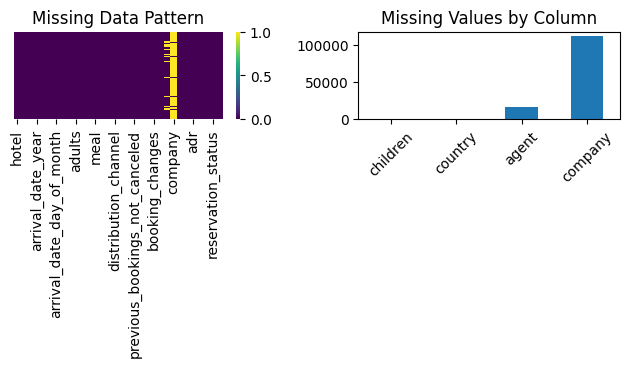

In [200]:
# Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

# Missing data bar plot
plt.subplot(2, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)

plt.tight_layout()

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


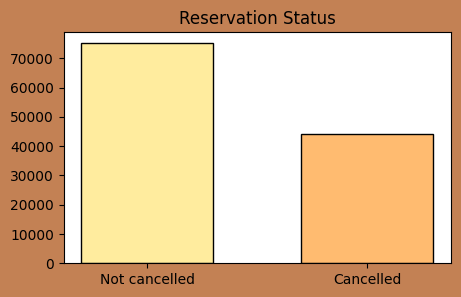

In [201]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

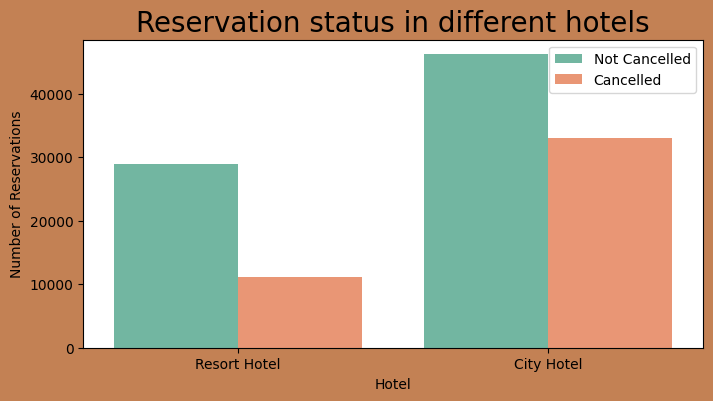

In [202]:
# Set the background color of the figure
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize labels
plt.legend(['Not Cancelled', 'Cancelled'])

plt.show()

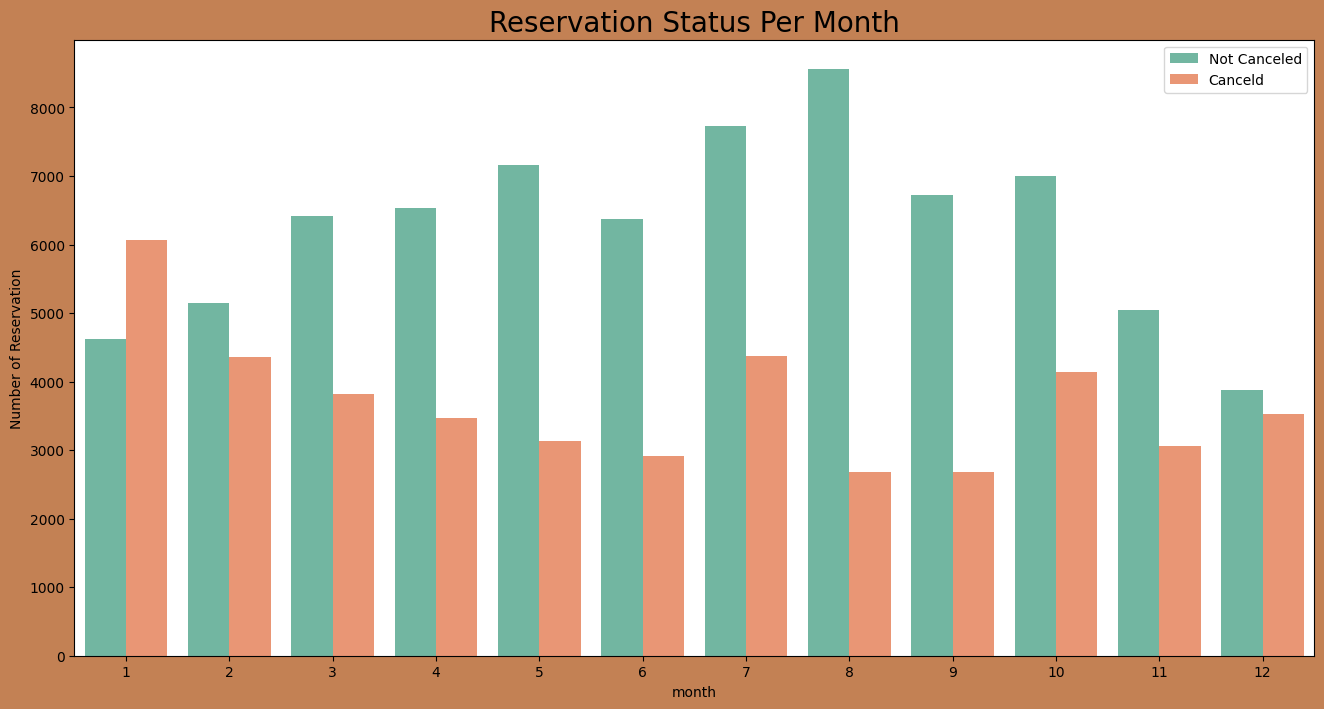

In [203]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8), facecolor='#C38154')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

#Scaling and Normalization

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()

X_train_scaled = scaler_standard.fit_transform(X_train_normalized) # Assuming X_train_normalized is the data to scale
X_test_scaled = scaler_standard.transform(X_test_normalized) # Assuming X_test_normalized is the data to scale

print("Training data after Standard Scaling:\n", X_train_scaled[:5])
print("\nTesting data after Standard Scaling:\n", X_test_scaled[:5])

Training data after Standard Scaling:
 [[ 0.70880097 -0.70880097 -0.31986197 ...  1.70167635 -0.25500241
  -0.72182686]
 [ 0.70880097 -0.70880097 -0.31986197 ...  0.8616889  -0.25500241
  -0.72182686]
 [ 0.70880097 -0.70880097 -0.31986197 ...  3.06909779 -0.25500241
  -0.72182686]
 [-1.41083328  1.41083328 -0.31986197 ... -0.23810862 -0.25500241
   0.54012817]
 [-1.41083328  1.41083328 -0.31986197 ... -1.16150878 -0.25500241
   0.54012817]]

Testing data after Standard Scaling:
 [[-1.41083328  1.41083328 -0.31986197 ... -0.68545078 -0.25500241
  -0.72182686]
 [ 0.70880097 -0.70880097 -0.31986197 ... -0.49596524 -0.25500241
  -0.72182686]
 [ 0.70880097 -0.70880097 -0.31986197 ... -0.818286   -0.25500241
   0.54012817]
 [ 0.70880097 -0.70880097 -0.31986197 ... -0.13457529 -0.25500241
  -0.72182686]
 [ 0.70880097 -0.70880097  3.12634855 ...  0.11937441 -0.25500241
  -0.72182686]]


In [206]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

# Fit on training data and transform both training and testing data
X_train_normalized = scaler.fit_transform(np.asarray(X_train))
X_test_normalized = scaler.transform(np.asarray(X_test))

print("Training data after Normalization:\n", X_train_normalized[:5])
print("\nTesting data after Normalization:\n", X_test_normalized[:5])

Training data after Normalization:
 [[1.         0.         0.         ... 0.03613878 0.         0.        ]
 [1.         0.         0.         ... 0.02818522 0.         0.        ]
 [1.         0.         0.         ... 0.04908645 0.         0.        ]
 [0.         1.         0.         ... 0.0177716  0.         0.2       ]
 [0.         1.         0.         ... 0.00902822 0.         0.2       ]]

Testing data after Normalization:
 [[0.         1.         0.         ... 0.01353586 0.         0.        ]
 [1.         0.         0.         ... 0.01533004 0.         0.        ]
 [1.         0.         0.         ... 0.01227809 0.         0.2       ]
 [1.         0.         0.         ... 0.01875192 0.         0.        ]
 [1.         0.         1.         ... 0.02115649 0.         0.        ]]


# Data Processing

In [207]:

#  missing values
#df.isnull().sum()
#df.drop(['company','agent', 'country'], axis =1, inplace = True)
#df.dropna(inplace =True)
#df.isnull().sum()

In [208]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [209]:
df['children'].fillna(df['children'].median(), inplace=True)

In [210]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119390.0,0.103886,0.0,0.0,0.0,0.0,10.0,0.398555
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


#Encoding

In [213]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['is_canceled'])

label

array([0, 0, 0, ..., 0, 0, 0])